In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
# Load dataset
df = pd.read_csv('BD_Weather.csv')

In [3]:
# EDA
print("Dataset shape:", df.shape)
print("\nMissing values:\n", df.isnull().sum())
print("\nSummary statistics:\n", df.describe())

Dataset shape: (76685, 8)

Missing values:
 Station        0
Year           0
Month          0
Day            0
Rainfall       0
Sunshine       0
Humidity       0
Temperature    0
dtype: int64

Summary statistics:
                Year         Month           Day      Rainfall      Sunshine  \
count  76685.000000  76685.000000  76685.000000  76685.000000  76685.000000   
mean    2020.499772      6.523962     15.726609      6.127835      5.914034   
std        1.707480      3.448442      8.798870     17.902041      3.269687   
min     2018.000000      1.000000      1.000000      0.000000      0.000000   
25%     2019.000000      4.000000      8.000000      0.000000      3.400000   
50%     2020.000000      7.000000     16.000000      0.000000      6.800000   
75%     2022.000000     10.000000     23.000000      2.000000      8.600000   
max     2023.000000     12.000000     31.000000    378.000000     28.500000   

           Humidity   Temperature  
count  76685.000000  76685.000000  
m

In [4]:
# Feature engineering
# Combine Year, Month, Day into datetime
df['Date'] = pd.to_datetime(df[['Year','Month','Day']])
df['DayOfYear'] = df['Date'].dt.dayofyear

# Month as cyclical feature
df['Month_sin'] = np.sin(2 * np.pi * df['Month']/12)
df['Month_cos'] = np.cos(2 * np.pi * df['Month']/12)

In [5]:
# Select features and target
features = ['Humidity', 'Sunshine', 'Rainfall', 'DayOfYear', 'Month_sin', 'Month_cos']
X = df[features]
y = df['Temperature']

In [6]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Feature scaling for Linear Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Predictions
y_train_pred_lr = lr_model.predict(X_train_scaled)
y_test_pred_lr = lr_model.predict(X_test_scaled)

In [9]:
# Metrics
mae_train_lr = mean_absolute_error(y_train, y_train_pred_lr)
mae_test_lr = mean_absolute_error(y_test, y_test_pred_lr)
mse_train_lr = mean_squared_error(y_train, y_train_pred_lr)
mse_test_lr = mean_squared_error(y_test, y_test_pred_lr)
rmse_train_lr = np.sqrt(mse_train_lr)
rmse_test_lr = np.sqrt(mse_test_lr)
r2_train_lr = r2_score(y_train, y_train_pred_lr)
r2_test_lr = r2_score(y_test, y_test_pred_lr)

In [10]:
print("----- Linear Regression Metrics -----")
print(f"Train MAE: {mae_train_lr:.2f}, Test MAE: {mae_test_lr:.2f}")
print(f"Train MSE: {mse_train_lr:.2f}, Test MSE: {mse_test_lr:.2f}")
print(f"Train RMSE: {rmse_train_lr:.2f}, Test RMSE: {rmse_test_lr:.2f}")
print(f"Train R²: {r2_train_lr:.2f}, Test R²: {r2_test_lr:.2f}")

----- Linear Regression Metrics -----
Train MAE: 1.75, Test MAE: 1.75
Train MSE: 4.82, Test MSE: 4.83
Train RMSE: 2.19, Test RMSE: 2.20
Train R²: 0.74, Test R²: 0.74


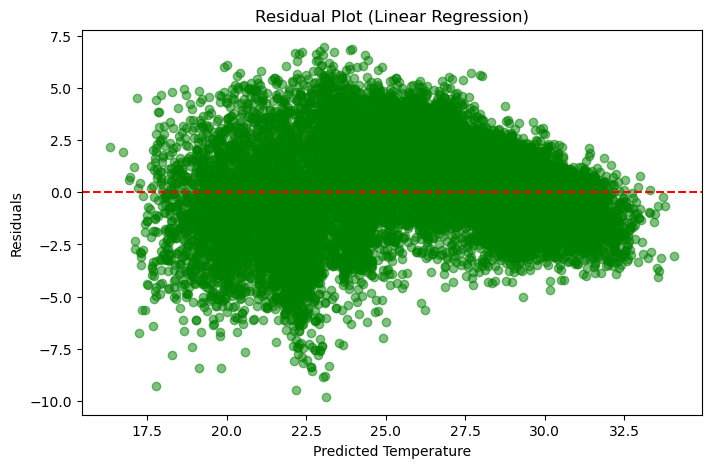

In [11]:
# Residuals
residuals_lr = y_test - y_test_pred_lr
plt.figure(figsize=(8,5))
plt.scatter(y_test_pred_lr, residuals_lr, alpha=0.5, color='green')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Temperature')
plt.ylabel('Residuals')
plt.title('Residual Plot (Linear Regression)')
plt.show()

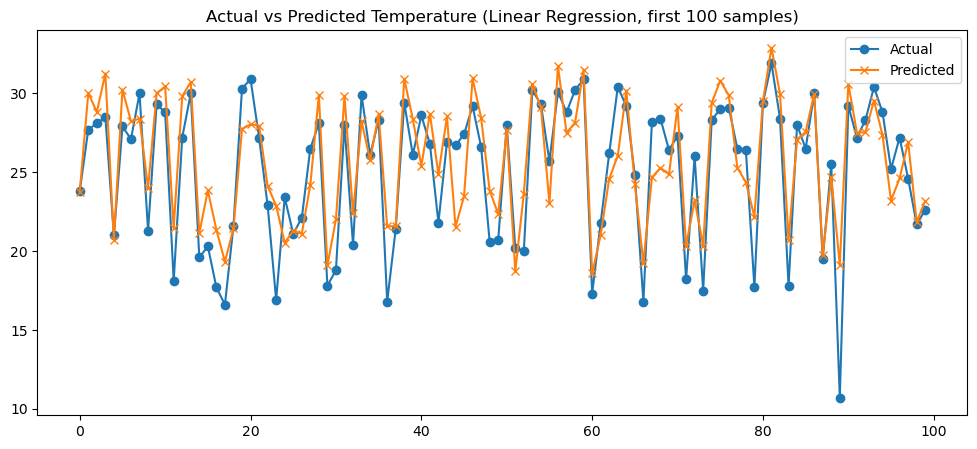

In [12]:
# Actual vs Predicted
plt.figure(figsize=(12,5))
plt.plot(y_test.values[:100], label='Actual', marker='o')
plt.plot(y_test_pred_lr[:100], label='Predicted', marker='x')
plt.title('Actual vs Predicted Temperature (Linear Regression, first 100 samples)')
plt.legend()
plt.show()

In [13]:
# Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train)

# Predictions
y_train_pred_ridge = ridge_model.predict(X_train_scaled)
y_test_pred_ridge = ridge_model.predict(X_test_scaled)

In [14]:
# Metrics
mae_train_ridge = mean_absolute_error(y_train, y_train_pred_ridge)
mae_test_ridge = mean_absolute_error(y_test, y_test_pred_ridge)
mse_train_ridge = mean_squared_error(y_train, y_train_pred_ridge)
mse_test_ridge = mean_squared_error(y_test, y_test_pred_ridge)
rmse_train_ridge = np.sqrt(mse_train_ridge)
rmse_test_ridge = np.sqrt(mse_test_ridge)
r2_train_ridge = r2_score(y_train, y_train_pred_ridge)
r2_test_ridge = r2_score(y_test, y_test_pred_ridge)

In [15]:
print("----- Ridge Regression Metrics -----")
print(f"Train MAE: {mae_train_ridge:.2f}, Test MAE: {mae_test_ridge:.2f}")
print(f"Train MSE: {mse_train_ridge:.2f}, Test MSE: {mse_test_ridge:.2f}")
print(f"Train RMSE: {rmse_train_ridge:.2f}, Test RMSE: {rmse_test_ridge:.2f}")
print(f"Train R²: {r2_train_ridge:.2f}, Test R²: {r2_test_ridge:.2f}")

----- Ridge Regression Metrics -----
Train MAE: 1.75, Test MAE: 1.75
Train MSE: 4.82, Test MSE: 4.83
Train RMSE: 2.19, Test RMSE: 2.20
Train R²: 0.74, Test R²: 0.74


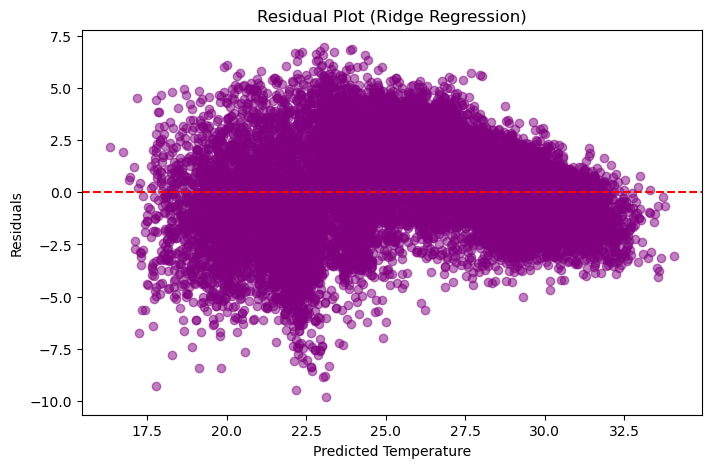

In [16]:
# Residuals
residuals_ridge = y_test - y_test_pred_ridge
plt.figure(figsize=(8,5))
plt.scatter(y_test_pred_ridge, residuals_ridge, alpha=0.5, color='purple')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Temperature')
plt.ylabel('Residuals')
plt.title('Residual Plot (Ridge Regression)')
plt.show()

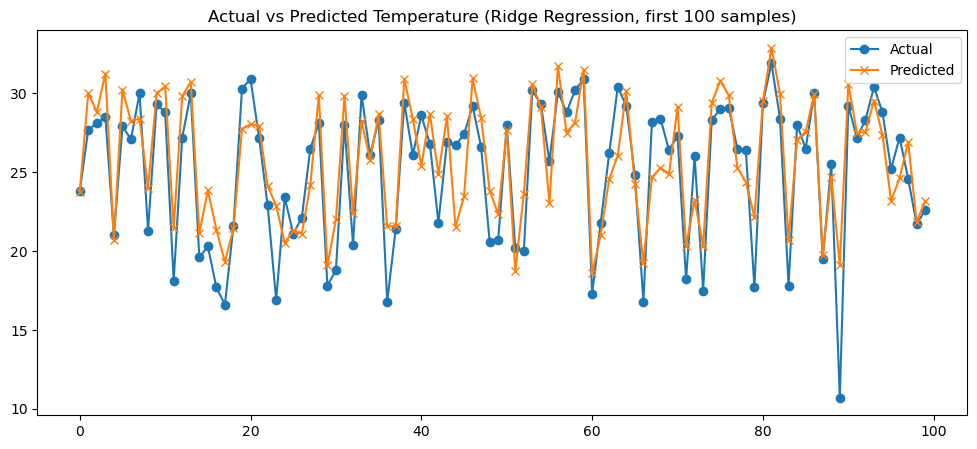

In [17]:
# Actual vs Predicted
plt.figure(figsize=(12,5))
plt.plot(y_test.values[:100], label='Actual', marker='o')
plt.plot(y_test_pred_ridge[:100], label='Predicted', marker='x')
plt.title('Actual vs Predicted Temperature (Ridge Regression, first 100 samples)')
plt.legend()
plt.show()

In [18]:
# Lasso Regression
lasso_model = Lasso(alpha=0.01)
lasso_model.fit(X_train_scaled, y_train)

# Predictions
y_train_pred_lasso = lasso_model.predict(X_train_scaled)
y_test_pred_lasso = lasso_model.predict(X_test_scaled)

In [19]:
# Metrics
mae_train_lasso = mean_absolute_error(y_train, y_train_pred_lasso)
mae_test_lasso = mean_absolute_error(y_test, y_test_pred_lasso)
mse_train_lasso = mean_squared_error(y_train, y_train_pred_lasso)
mse_test_lasso = mean_squared_error(y_test, y_test_pred_lasso)
rmse_train_lasso = np.sqrt(mse_train_lasso)
rmse_test_lasso = np.sqrt(mse_test_lasso)
r2_train_lasso = r2_score(y_train, y_train_pred_lasso)
r2_test_lasso = r2_score(y_test, y_test_pred_lasso)

In [20]:
print("----- Lasso Regression Metrics -----")
print(f"Train MAE: {mae_train_lasso:.2f}, Test MAE: {mae_test_lasso:.2f}")
print(f"Train MSE: {mse_train_lasso:.2f}, Test MSE: {mse_test_lasso:.2f}")
print(f"Train RMSE: {rmse_train_lasso:.2f}, Test RMSE: {rmse_test_lasso:.2f}")
print(f"Train R²: {r2_train_lasso:.2f}, Test R²: {r2_test_lasso:.2f}")

----- Lasso Regression Metrics -----
Train MAE: 1.75, Test MAE: 1.75
Train MSE: 4.82, Test MSE: 4.84
Train RMSE: 2.20, Test RMSE: 2.20
Train R²: 0.74, Test R²: 0.74


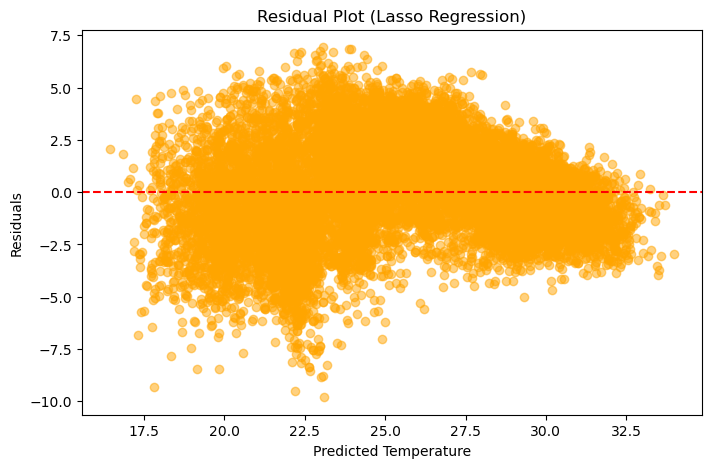

In [21]:
# Residuals
residuals_lasso = y_test - y_test_pred_lasso
plt.figure(figsize=(8,5))
plt.scatter(y_test_pred_lasso, residuals_lasso, alpha=0.5, color='orange')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Temperature')
plt.ylabel('Residuals')
plt.title('Residual Plot (Lasso Regression)')
plt.show()

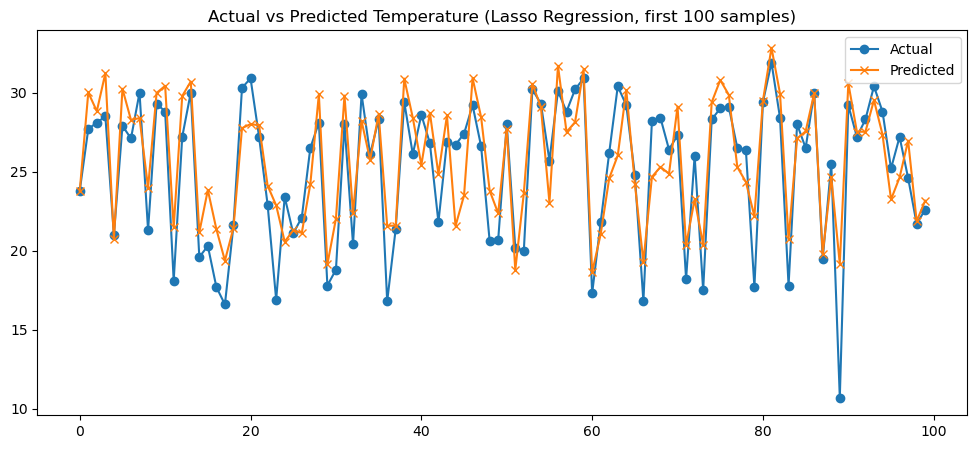

In [22]:
# Actual vs Predicted
plt.figure(figsize=(12,5))
plt.plot(y_test.values[:100], label='Actual', marker='o')
plt.plot(y_test_pred_lasso[:100], label='Predicted', marker='x')
plt.title('Actual vs Predicted Temperature (Lasso Regression, first 100 samples)')
plt.legend()
plt.show()

In [23]:
# Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_train_pred_rf = rf_model.predict(X_train)
y_test_pred_rf = rf_model.predict(X_test)

In [24]:
# Metrics
mae_train_rf = mean_absolute_error(y_train, y_train_pred_rf)
mae_test_rf = mean_absolute_error(y_test, y_test_pred_rf)
mse_train_rf = mean_squared_error(y_train, y_train_pred_rf)
mse_test_rf = mean_squared_error(y_test, y_test_pred_rf)
rmse_train_rf = np.sqrt(mse_train_rf)
rmse_test_rf = np.sqrt(mse_test_rf)
r2_train_rf = r2_score(y_train, y_train_pred_rf)
r2_test_rf = r2_score(y_test, y_test_pred_rf)

In [25]:
print("----- Random Forest Regressor Metrics -----")
print(f"Train MAE: {mae_train_rf:.2f}, Test MAE: {mae_test_rf:.2f}")
print(f"Train MSE: {mse_train_rf:.2f}, Test MSE: {mse_test_rf:.2f}")
print(f"Train RMSE: {rmse_train_rf:.2f}, Test RMSE: {rmse_test_rf:.2f}")
print(f"Train R²: {r2_train_rf:.2f}, Test R²: {r2_test_rf:.2f}")

----- Random Forest Regressor Metrics -----
Train MAE: 0.40, Test MAE: 1.00
Train MSE: 0.32, Test MSE: 1.85
Train RMSE: 0.57, Test RMSE: 1.36
Train R²: 0.98, Test R²: 0.90


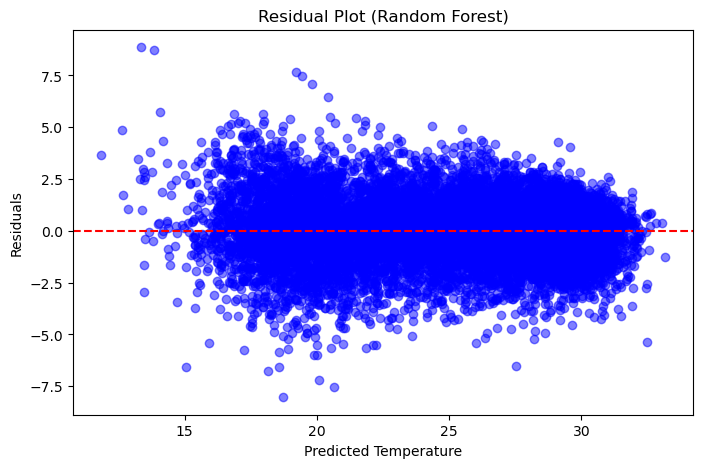

In [26]:
# Residuals
residuals_rf = y_test - y_test_pred_rf
plt.figure(figsize=(8,5))
plt.scatter(y_test_pred_rf, residuals_rf, alpha=0.5, color='blue')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Temperature')
plt.ylabel('Residuals')
plt.title('Residual Plot (Random Forest)')
plt.show()

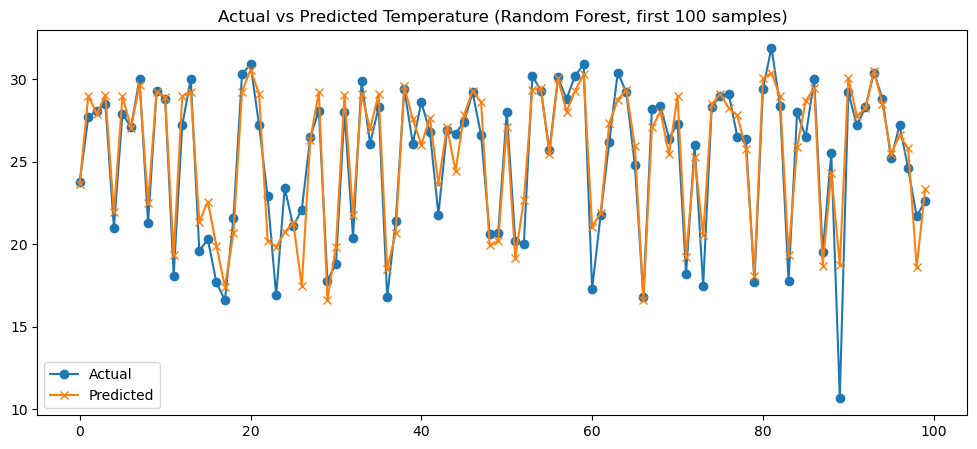

In [27]:
# Actual vs Predicted
plt.figure(figsize=(12,5))
plt.plot(y_test.values[:100], label='Actual', marker='o')
plt.plot(y_test_pred_rf[:100], label='Predicted', marker='x')
plt.title('Actual vs Predicted Temperature (Random Forest, first 100 samples)')
plt.legend()
plt.show()

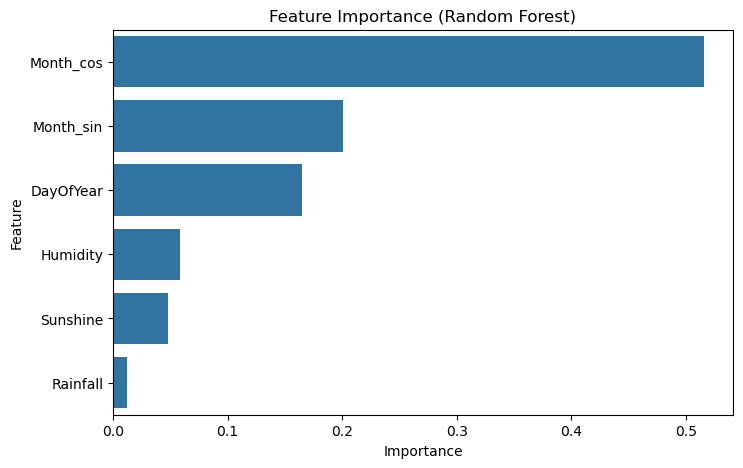

In [28]:
# Feature Importance
feature_importance = pd.DataFrame({
    'Feature': features,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance (Random Forest)')
plt.show()

In [29]:
print("\nRandom Forest Feature Importance:\n", feature_importance)


Random Forest Feature Importance:
      Feature  Importance
5  Month_cos    0.515236
4  Month_sin    0.200640
3  DayOfYear    0.165287
0   Humidity    0.058243
1   Sunshine    0.048348
2   Rainfall    0.012246


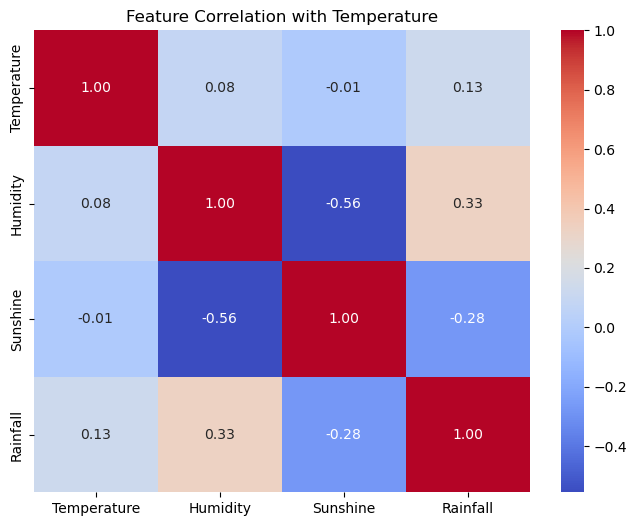

In [30]:
# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df[['Temperature','Humidity','Sunshine','Rainfall']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation with Temperature')
plt.show()

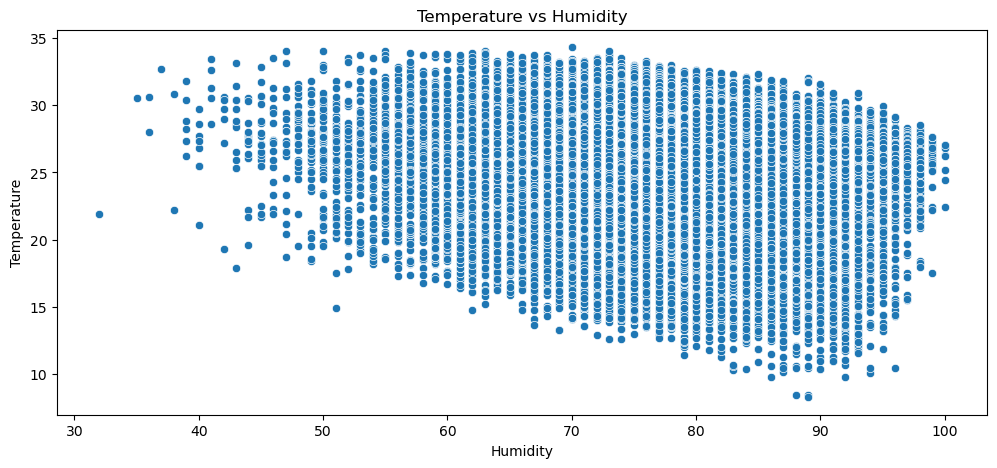

In [31]:
# Scatter plots for trend analysis
plt.figure(figsize=(12,5))
sns.scatterplot(x='Humidity', y='Temperature', data=df)
plt.title('Temperature vs Humidity')
plt.show()

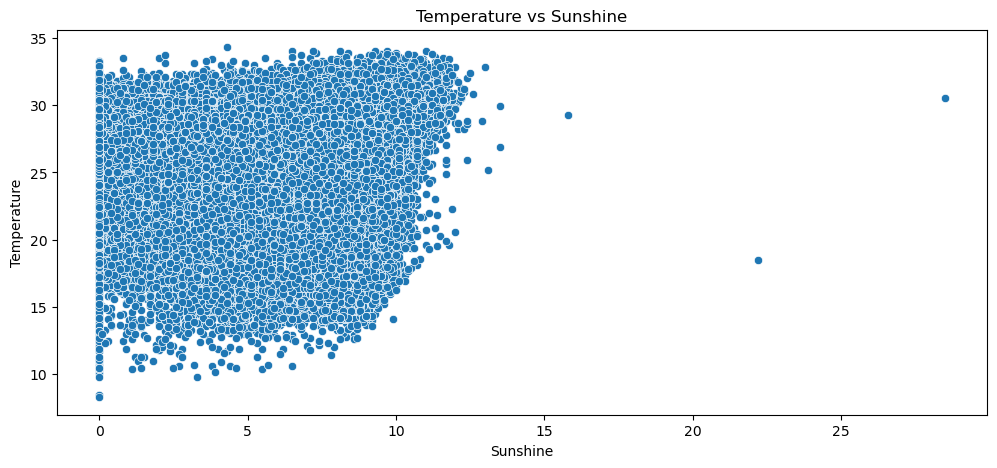

In [32]:
plt.figure(figsize=(12,5))
sns.scatterplot(x='Sunshine', y='Temperature', data=df)
plt.title('Temperature vs Sunshine')
plt.show()

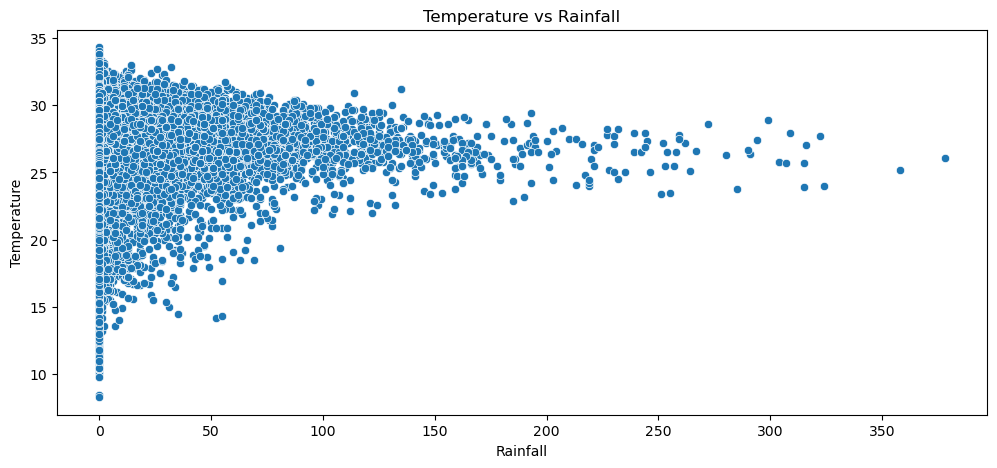

In [33]:
plt.figure(figsize=(12,5))
sns.scatterplot(x='Rainfall', y='Temperature', data=df)
plt.title('Temperature vs Rainfall')
plt.show()

## Part–2: Classification → Rainfall Yes/No Prediction

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, auc

In [35]:
# ---------------- CREATE BINARY TARGET ----------------
# 0 → No Rain, 1 → Rain
df['RainBinary'] = df['Rainfall'].apply(lambda x: 1 if x > 0 else 0)

print(df['RainBinary'].value_counts())
print(df['RainBinary'].unique())

RainBinary
0    52831
1    23854
Name: count, dtype: int64
[0 1]


In [36]:
# ---------------- FEATURES ----------------
X = df[['Sunshine', 'Humidity', 'Temperature']]   # input
y = df['RainBinary']   

In [37]:
# ---------------- TRAIN TEST SPLIT ----------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [38]:
# ---------------- SCALE (FOR LOGISTIC) ----------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [39]:
# ---------------- SMOTE (FOR LR & RF) ----------------
sm = SMOTE(random_state=42)

In [40]:
# LR SMOTE (scaled)
X_train_lr, y_train_lr = sm.fit_resample(X_train_scaled, y_train)

# RF SMOTE (non-scaled)
X_train_rf, y_train_rf = sm.fit_resample(X_train, y_train)

print("\nAfter SMOTE Rebalancing:", y_train_lr.value_counts())


After SMOTE Rebalancing: RainBinary
0    42265
1    42265
Name: count, dtype: int64


In [41]:
# ---------------- LOGISTIC REGRESSION ----------------
log_model = LogisticRegression()
log_model.fit(X_train_lr, y_train_lr)

y_pred_log = log_model.predict(X_test_scaled)
y_prob_log = log_model.predict_proba(X_test_scaled)[:,1]

In [42]:
print("\n===== Logistic Regression =====")
# Confusion Matrix
cm_log = confusion_matrix(y_test, y_pred_log)
print("Confusion Matrix:\n", cm_log)
# Accuracy
acc_log = accuracy_score(y_test, y_pred_log)
print(f"Accuracy: {acc_log:.2f}")
# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred_log))


===== Logistic Regression =====
Confusion Matrix:
 [[7627 2939]
 [ 912 3859]]
Accuracy: 0.75

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.72      0.80     10566
           1       0.57      0.81      0.67      4771

    accuracy                           0.75     15337
   macro avg       0.73      0.77      0.73     15337
weighted avg       0.79      0.75      0.76     15337



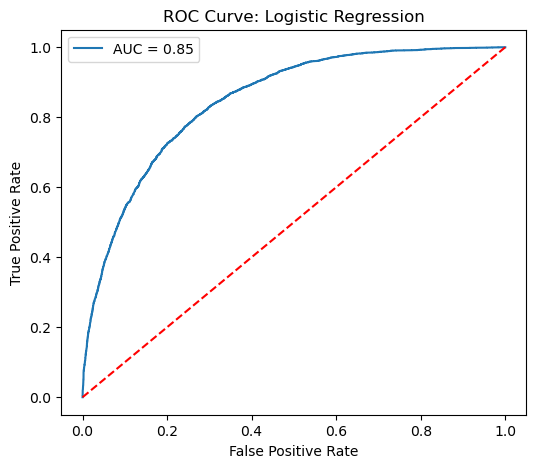

In [43]:
# ROC Curve
fpr_log, tpr_log, _ = roc_curve(y_test, y_prob_log)
roc_auc_log = auc(fpr_log, tpr_log)

plt.figure(figsize=(6,5))
plt.plot(fpr_log, tpr_log, label=f"AUC = {roc_auc_log:.2f}")
plt.plot([0,1],[0,1],'r--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve: Logistic Regression")
plt.legend()
plt.show()

In [44]:
# ---------------- RANDOM FOREST Classification ----------------
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train_rf, y_train_rf)   

y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:,1]

In [45]:
print("\n===== Random Forest Classifier =====")
cm_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:\n", cm_rf)
acc_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy: {acc_rf:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))


===== Random Forest Classifier =====
Confusion Matrix:
 [[8687 1879]
 [1753 3018]]
Accuracy: 0.76

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.82      0.83     10566
           1       0.62      0.63      0.62      4771

    accuracy                           0.76     15337
   macro avg       0.72      0.73      0.73     15337
weighted avg       0.76      0.76      0.76     15337



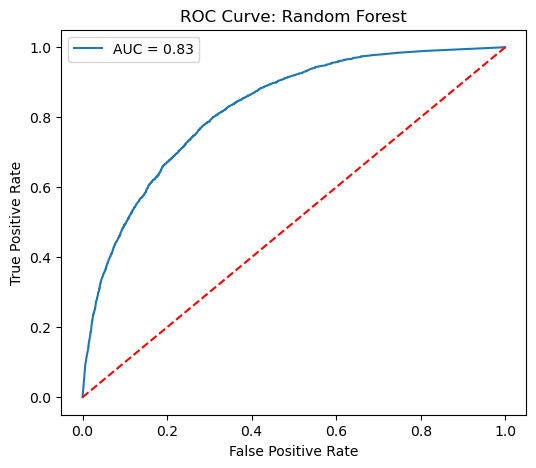

In [46]:
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(6,5))
plt.plot(fpr_rf, tpr_rf, label=f"AUC = {roc_auc_rf:.2f}")
plt.plot([0,1],[0,1],'r--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve: Random Forest")
plt.legend()
plt.show()

In [47]:
!pip install xgboost

In [48]:
!pip install lightgbm

In [49]:
# Models
from xgboost import XGBClassifier
import xgboost as xgb
import lightgbm as lgb

In [50]:
# ---------------- XGBOOST (WITH CLASS WEIGHT) ----------------
neg = (y_train == 0).sum()
pos = (y_train == 1).sum()
scale_pos_weight = neg / pos

xgb_model = xgb.XGBClassifier(
    eval_metric='logloss',
    random_state=42,
    scale_pos_weight=scale_pos_weight
)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)
y_prob_xgb = xgb_model.predict_proba(X_test)[:,1]

In [51]:
print("\n===== XGBoost Classifier =====")
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
print("Confusion Matrix:\n", cm_xgb)
acc_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"Accuracy: {acc_xgb:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))


===== XGBoost Classifier =====
Confusion Matrix:
 [[7944 2622]
 [ 991 3780]]
Accuracy: 0.76

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.75      0.81     10566
           1       0.59      0.79      0.68      4771

    accuracy                           0.76     15337
   macro avg       0.74      0.77      0.75     15337
weighted avg       0.80      0.76      0.77     15337



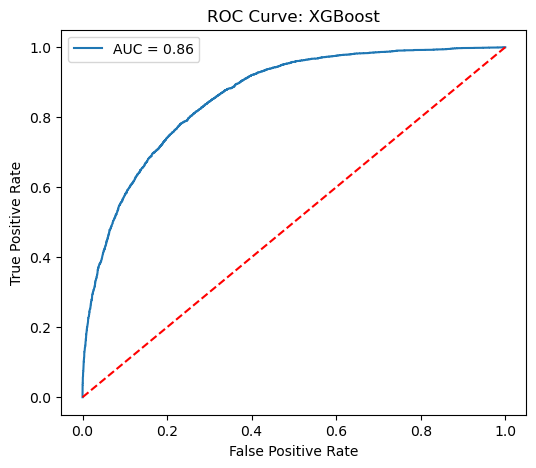

In [52]:
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_prob_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)
plt.figure(figsize=(6,5))
plt.plot(fpr_xgb, tpr_xgb, label=f"AUC = {roc_auc_xgb:.2f}")
plt.plot([0,1],[0,1],'r--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve: XGBoost")
plt.legend()
plt.show()

In [53]:
# ---------------- LIGHTGBM (WITH CLASS WEIGHT) ----------------
lgb_model = lgb.LGBMClassifier(
    random_state=42,
    is_unbalance=True
)
lgb_model.fit(X_train, y_train)

y_pred_lgb = lgb_model.predict(X_test)
y_prob_lgb = lgb_model.predict_proba(X_test)[:,1]

[LightGBM] [Info] Number of positive: 19083, number of negative: 42265
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003581 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 422
[LightGBM] [Info] Number of data points in the train set: 61348, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.311061 -> initscore=-0.795161
[LightGBM] [Info] Start training from score -0.795161


In [54]:
print("\n===== LightGBM Classifier =====")
cm_lgb = confusion_matrix(y_test, y_pred_lgb)
print("Confusion Matrix:\n", cm_lgb)
acc_lgb = accuracy_score(y_test, y_pred_lgb)
print(f"Accuracy: {acc_lgb:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_lgb))


===== LightGBM Classifier =====
Confusion Matrix:
 [[7933 2633]
 [ 959 3812]]
Accuracy: 0.77

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.75      0.82     10566
           1       0.59      0.80      0.68      4771

    accuracy                           0.77     15337
   macro avg       0.74      0.77      0.75     15337
weighted avg       0.80      0.77      0.77     15337



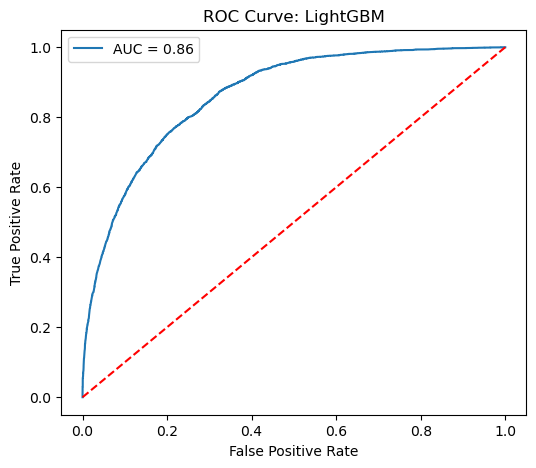

In [55]:
fpr_lgb, tpr_lgb, _ = roc_curve(y_test, y_prob_lgb)
roc_auc_lgb = auc(fpr_lgb, tpr_lgb)
plt.figure(figsize=(6,5))
plt.plot(fpr_lgb, tpr_lgb, label=f"AUC = {roc_auc_lgb:.2f}")
plt.plot([0,1],[0,1],'r--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve: LightGBM")
plt.legend()
plt.show()


Classifier Performance:
             Classifier  Accuracy   ROC AUC
0  Logistic Regression  0.748908  0.847622
1        Random Forest  0.763187  0.825050
2              XGBoost  0.764426  0.861086
3             LightGBM  0.765795  0.863343


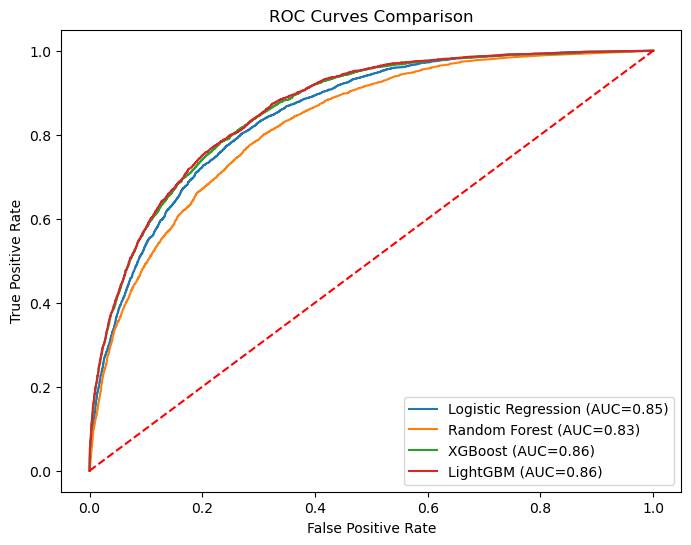

In [56]:
# Accuracy comparison table
import pandas as pd

classifiers = ['Logistic Regression', 'Random Forest', 'XGBoost', 'LightGBM']
accuracies = [acc_log, acc_rf, acc_xgb, acc_lgb]
roc_aucs = [roc_auc_log, roc_auc_rf, roc_auc_xgb, roc_auc_lgb]

metrics_df = pd.DataFrame({'Classifier': classifiers, 'Accuracy': accuracies, 'ROC AUC': roc_aucs})
print("\nClassifier Performance:\n", metrics_df)

# Plot ROC Curves together
plt.figure(figsize=(8,6))
plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC={roc_auc_log:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC={roc_auc_rf:.2f})')
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC={roc_auc_xgb:.2f})')
plt.plot(fpr_lgb, tpr_lgb, label=f'LightGBM (AUC={roc_auc_lgb:.2f})')
plt.plot([0,1],[0,1],'r--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves Comparison")
plt.legend()
plt.show()

## Part-3: Weather Station Similarity (Clustering)

In [57]:
from sklearn.cluster import KMeans

In [58]:
# Compute Average per Station
features = ['Temperature', 'Humidity', 'Rainfall', 'Sunshine']
df_avg = df.groupby('Station')[features].mean().reset_index()
print(df_avg.head(35))

       Station  Temperature   Humidity   Rainfall  Sunshine
0   Ambaganctg    26.302054  79.676403   7.695573  5.963350
1      Barisal    25.647056  82.578275   4.970790  6.175399
2        Bhola    25.919763  82.840256   5.370151  5.743131
3        Bogra    25.725057  77.068918   4.933364  5.386627
4     Chandpur    26.463943  79.556823   5.328161  5.725377
5   Chittagong    26.582793  77.563213   7.361935  6.279872
6    Chuadanga    25.158603  79.963943   3.783204  6.139890
7      Comilla    25.612095  79.719763   5.246006  6.209311
8    Coxsbazar    26.460292  78.158832   8.393884  6.959105
9        Dhaka    26.581105  72.482885   4.940666  5.155682
10    Dinajpur    25.049110  78.462346   5.265176  5.897718
11    Faridpur    25.989320  78.790050   5.183021  6.111456
12        Feni    25.510543  78.141944   7.042903  5.897627
13      Hatiya    25.901552  85.278412   8.093108  6.006664
14     Ishurdi    25.326654  78.826107   4.000456  6.215290
15     Jessore    26.019169  78.183934  

In [59]:
# Standardize Features
X = df_avg[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [60]:
# not showing Windows+MKL warning
import warnings
warnings.filterwarnings("ignore", message=".*KMeans is known to have a memory leak.*")

In [61]:
# Elbow Method to find optimal k
inertia = []
K_range = range(1, 10)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

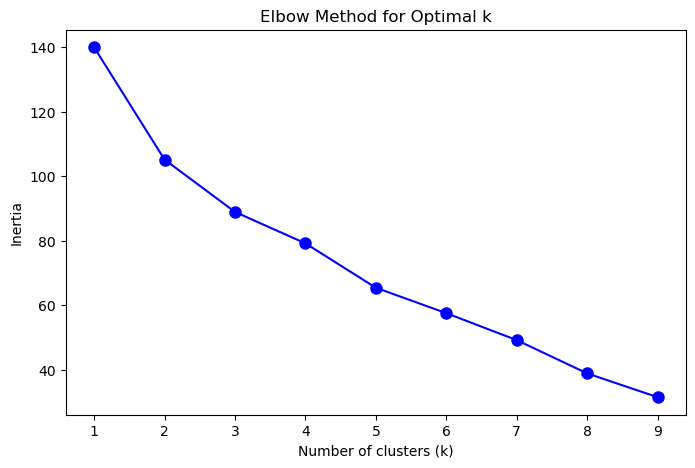

In [62]:
# Plot Elbow Curve
plt.figure(figsize=(8,5))
plt.plot(K_range, inertia, 'bo-', markersize=8)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [63]:
# Apply K-Means (Choose k=3 or 4)
k = 3  # or 4 based on elbow
kmeans = KMeans(n_clusters=k, random_state=42)
df_avg['Cluster'] = kmeans.fit_predict(X_scaled)

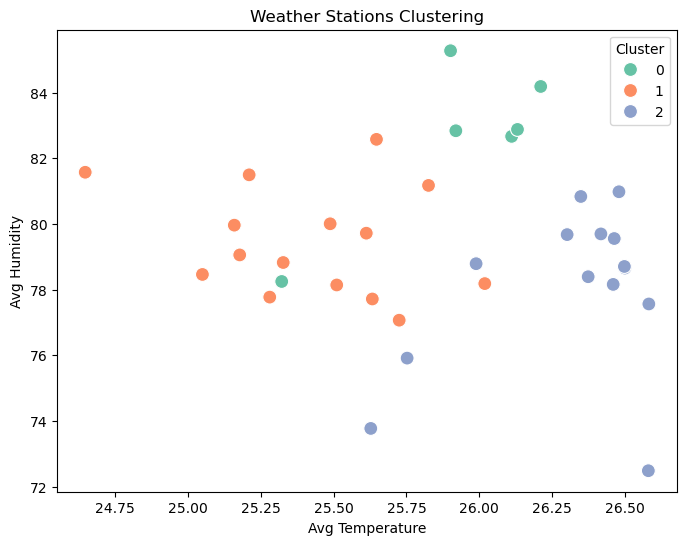

In [64]:
# Cluster Plot (2D using Temperature & Humidity)
# indicate station Grouping
plt.figure(figsize=(8,6))
sns.scatterplot(x=df_avg['Temperature'], y=df_avg['Humidity'], 
                hue=df_avg['Cluster'], palette='Set2', s=100)
plt.title('Weather Stations Clustering')
plt.xlabel('Avg Temperature')
plt.ylabel('Avg Humidity')
plt.legend(title='Cluster')
plt.show()

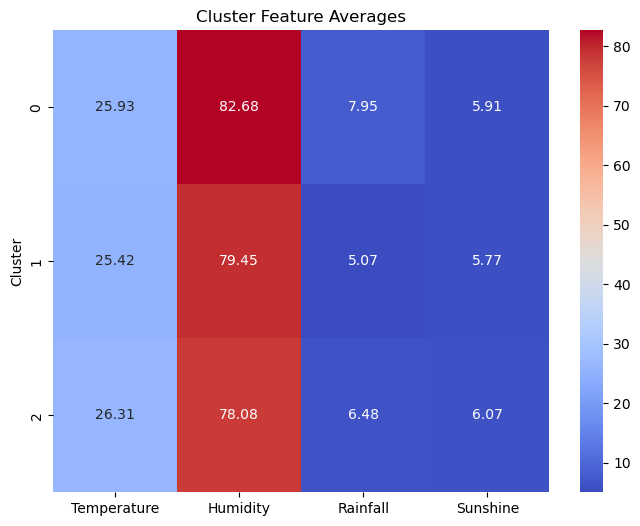

In [65]:
# Heatmap of clusters and features
cluster_means = df_avg.groupby('Cluster')[features].mean()
plt.figure(figsize=(8,6))
sns.heatmap(cluster_means, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Cluster Feature Averages')
plt.show()

In [66]:
# Interpretation
for i in range(k):
    stations = df_avg[df_avg['Cluster'] == i]['Station'].tolist()
    print(f"\nCluster {i} Stations ({len(stations)}): {stations}")


Cluster 0 Stations (6): ['Bhola', 'Hatiya', 'Khepupara', 'Patuakhali', 'Sandwip', 'Sylhet']

Cluster 1 Stations (15): ['Barisal', 'Bogra', 'Chuadanga', 'Comilla', 'Dinajpur', 'Feni', 'Ishurdi', 'Jessore', 'Madaripur', 'Mymensingh', 'Rajshahi', 'Rangpur', 'Srimangal', 'Sydpur', 'Tangail']

Cluster 2 Stations (14): ['Ambaganctg', 'Chandpur', 'Chittagong', 'Coxsbazar', 'Dhaka', 'Faridpur', 'Khulna', 'Kutubdia', 'Mcourt', 'Mongla', 'Rangamati', 'Satkhira', 'Sitakunda', 'Teknaf']


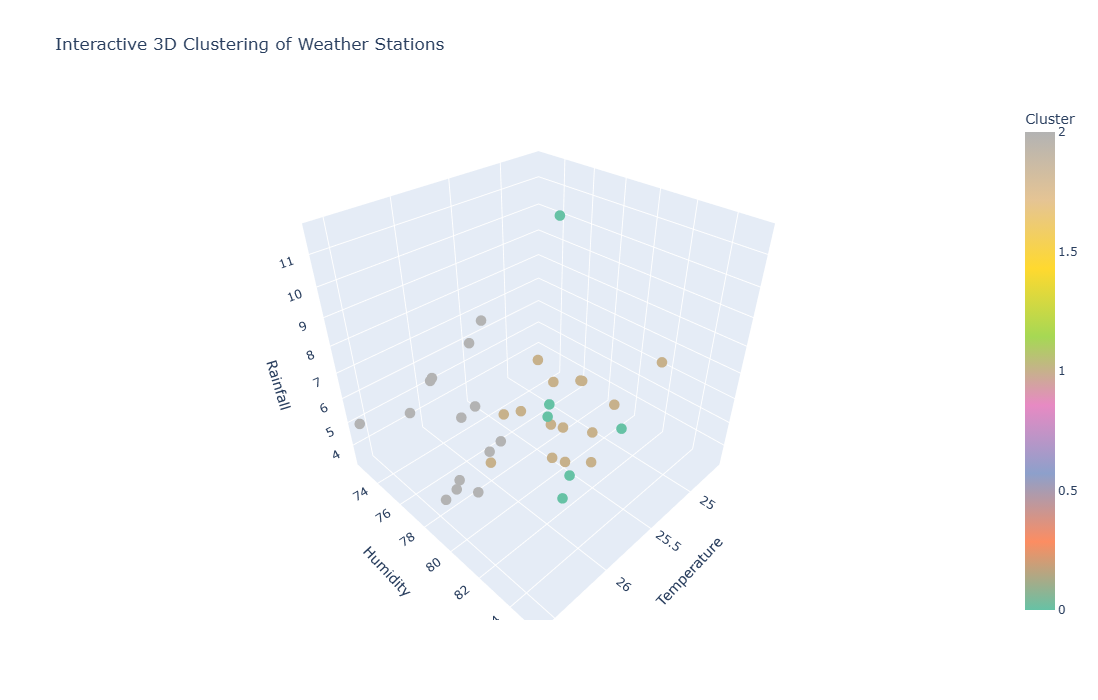

In [67]:
# Install plotly if not installed
# !pip install plotly

import plotly.express as px

# 3D interactive scatter plot
fig = px.scatter_3d(df_avg, 
                    x='Temperature', 
                    y='Humidity', 
                    z='Rainfall',
                    color='Cluster', 
                    hover_data=['Station'],
                    title='Interactive 3D Clustering of Weather Stations',
                    color_continuous_scale=px.colors.qualitative.Set2,
                    height=700)

fig.update_traces(marker=dict(size=6))
fig.show()


In [68]:
# Climate Zone
for c in range(k):
    print(f"\nCluster {c} Climate Pattern:")
    temp = cluster_means.loc[c, 'Temperature']
    hum = cluster_means.loc[c, 'Humidity']
    rain = cluster_means.loc[c, 'Rainfall']
    sun  = cluster_means.loc[c, 'Sunshine']

    desc = ""

    if rain > cluster_means['Rainfall'].mean() and hum > cluster_means['Humidity'].mean():
        desc = "Wet & Humid Zone"
    elif sun > cluster_means['Sunshine'].mean() and temp > cluster_means['Temperature'].mean():
        desc = "Sunny & Hot Zone"
    elif temp < cluster_means['Temperature'].mean() and hum < cluster_means['Humidity'].mean():
        desc = "Cool & Dry Zone"
    else:
        desc = "Mixed Climate Zone"

    print(desc)


Cluster 0 Climate Pattern:
Wet & Humid Zone

Cluster 1 Climate Pattern:
Cool & Dry Zone

Cluster 2 Climate Pattern:
Sunny & Hot Zone
